一组txt文件，每个txt文件是当年的新生婴儿的姓名，性别和这个名字出现的数量，仅包括当年出现五次以上的名字。数据预处理工作在于缩小数据集，提取出有效性息top1000的数据集。

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
names1880 = pd.read_csv('C:/yob1880.txt',names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


统计该年度的新生婴儿男女比（分组求和）groupby/sum

In [8]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

分割的文件无法进行数据分析等操作，所以我们第一步需要将所有的数据读取并且合并，把所有年份的数据品拼接成一个dataframe, 通过占位符循环读取文件，增加一列年份。指定ignore_index=True，因为我们希望按照1，2，3...重新构建索引

In [9]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'C:/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692316,Zymaire,M,5,2010
1692317,Zyonne,M,5,2010
1692318,Zyquarius,M,5,2010
1692319,Zyran,M,5,2010


https://zhuanlan.zhihu.com/p/31952948  
pivot_table有四个最重要的参数index、values、columns、aggfunc，index就是层次字段，values是对需要的数据进行筛选，aggfunc是聚合操作（默认是mean），column可选是列层次字段。

In [10]:
total_births = pd.pivot_table(names, 'births', index='year',columns='sex', aggfunc=sum)
print(type(total_births))
total_births.tail()

<class 'pandas.core.frame.DataFrame'>


sex,F,M
year,,
2006,1900190,2054166
2007,1921491,2074249
2008,1889593,2038796
2009,1835649,1982082
2010,1775986,1917177


DataFrame.pivot(self, index=None, columns=None, values=None)  
DataFrame.pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True,margins_name='All', observed=False)  
1. pivot：无法聚合，只能简单重塑，如果index+column一样将会报错；常用于处理非数字数据。
2. pivot_table：可以聚合，正好弥补 pivot 的缺陷。

In [11]:
total_births1 = names.groupby(['year','sex'])['births'].sum()
print(type(total_births1))
total_births1.tail(10)

<class 'pandas.core.series.Series'>


year  sex
2006  F      1900190
      M      2054166
2007  F      1921491
      M      2074249
2008  F      1889593
      M      2038796
2009  F      1835649
      M      1982082
2010  F      1775986
      M      1917177
Name: births, dtype: int64

除column外等价  
pd.pivot_table(df,index=[字段1],values=[字段2],aggfunc=[函数],fill_value=0)；
df.groupby([字段1])[字段2].agg(函数).fillna(0)；
当表格生成后可以用query进行查询

In [12]:
total = names.groupby(['year', 'sex'])
list(total)

[((1880, 'F'),
            name sex  births  year
  0         Mary   F    7065  1880
  1         Anna   F    2604  1880
  2         Emma   F    2003  1880
  3    Elizabeth   F    1939  1880
  4       Minnie   F    1746  1880
  ..         ...  ..     ...   ...
  937        Ula   F       5  1880
  938     Vannie   F       5  1880
  939     Verona   F       5  1880
  940     Vertie   F       5  1880
  941      Wilma   F       5  1880
  
  [942 rows x 4 columns]),
 ((1880, 'M'),
             name sex  births  year
  942        John   M    9655  1880
  943     William   M    9532  1880
  944       James   M    5927  1880
  945     Charles   M    5348  1880
  946      George   M    5126  1880
  ...         ...  ..     ...   ...
  1995     Woodie   M       5  1880
  1996     Worthy   M       5  1880
  1997     Wright   M       5  1880
  1998       York   M       5  1880
  1999  Zachariah   M       5  1880
  
  [1058 rows x 4 columns]),
 ((1881, 'F'),
             name sex  births  year
  2000

groupby得到的只是分组，会根据后面的聚合函数或者apply函数生成不同的index

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

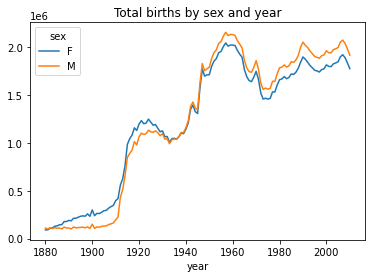

In [14]:
total_births.plot(title='Total births by sex and year')

插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。prop值为0.02表示每100名婴儿中有2名取了这个名字。
因此，我们先按year和sex分组，然后再将新列加到各个分组上。
groupby.apply是将一个（已经分过组的）dataframe作为输入，**对每个group进行操作后**，将结果整合为一个dataframe或者series或者标量返回

In [160]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


有效性检验：总和是不是1

In [92]:
 names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      0.451610
      M      0.548390
1881  F      0.477185
      M      0.522815
1882  F      0.486828
               ...   
2008  M      0.518982
2009  F      0.480832
      M      0.519168
2010  F      0.480947
      M      0.519053
Name: prop, Length: 262, dtype: float64

为了便于实现更进⼀步的分析，我需要取出该数据的⼀个⼦集：每对sex/year组合的前1000个名字。sort_value是排序，默认ascending=True即升序。

In [25]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


也可以直接通过concat进行拼接,for year,group里面的year是分组的类别，group是这组里面的东西，如第一个year就是（180，'F'）,group就是这里面的所有婴儿数据。通过ignore_index=True重新编号。

In [26]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


接下来的数据分析⼯作就主要针对这个top1000数据集。  
我们会分析命名的趋势  
命名多样性的增长  
变成女孩名字的男孩名字和变成男孩名字的女孩名字    
最后一个字母的变化

# 分析命名趋势

pandas.pivot_table



有了完整的数据集和刚才生成的top1000数据集，我们就可以开始分析各种命名趋势了。首先将前1000个名字分为男女两个部分：

In [11]:
boys = top1000[top1000.sex == 'M']

girls = top1000[top1000.sex == 'F']

# 条件设定

这是两个简单的时间序列，只需稍作整理即可绘制出相应的图表（比如每年叫做John和Mary的婴儿数）。我们先生成一张按year和name统计的总出生数透视表：

In [35]:
total_births = top1000.pivot_table('births', index='year',
                                columns='name',
                                  aggfunc=sum)
total_births


"""
pandas.pivot_table
透视表是一种可以对数据动态排布并且分类汇总的表格格式
四个最重要的参数index、values、columns、aggfunc

Index
每个pivot_table必须拥有一个index
（两层索引）

Values
通过上面的操作，我们获取了james harden在对阵对手时的所有数据，而Values可以对需要的计算数据进行筛选

aggfunc
参数可以设置我们对数据聚合时进行的函数操作。

当我们未设置aggfunc时，它默认aggfunc='mean'计算均值

Columns
类似Index可以设置列层次字段，它不是一个必要参数，作为一种分割数据的可选方式。
"""


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3745.0,NaN,8300.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2853.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3958.0,NaN,8941.0,NaN,NaN,314.0,NaN,349.0,468.0,...,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,957.0,4042.0,219.0,8542.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3448.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
total_births.info()

"""
info()函数 功能: 给出样本数据的相关信息概览 :行数,列数,列索引,列非空值个数,列类型,内存占用
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6873 entries, Aaden to Zuri
dtypes: float64(6873)
memory usage: 6.9 MB


'\ninfo()函数 功能: 给出样本数据的相关信息概览 :行数,列数,列索引,列非空值个数,列类型,内存占用\n'

现在，我们用DataFrame的plot方法绘制几个名字的曲线图（见图14-5）：

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

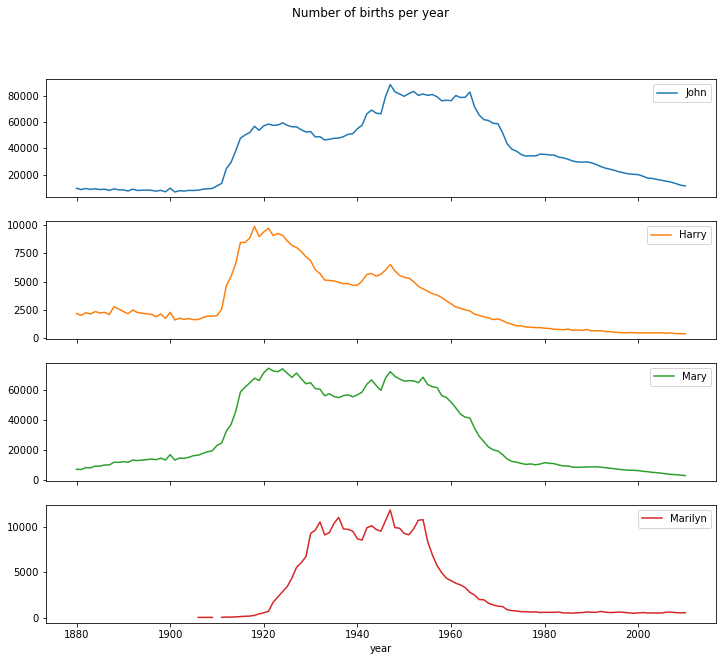

In [24]:
# Selection

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title="Number of births per year")




"""
matplotlib.pyplot.plot
系列模块函数
主要参数：
subplots : boolean, default False#是否对列分别作子图
figsize : a tuple (width, height) in inches#图片尺寸大小
grid : boolean, default None#图片是否有网格

use_index : boolean, default True#默认用索引做x轴

title : string#图片的标题用字符串 Title to use for the plot

legend : False/True/’reverse’#子图的图例 (默认为True)

logx : boolean, default False#设置x轴刻度是否取对数

logy : boolean, default False

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

format_string：控制曲线的格式字符串，可选，由颜色字符、风格字符和标记字符组成。



延申： 设置plot figure axes =subplot 画图 可以加一起 （最标准）

"""


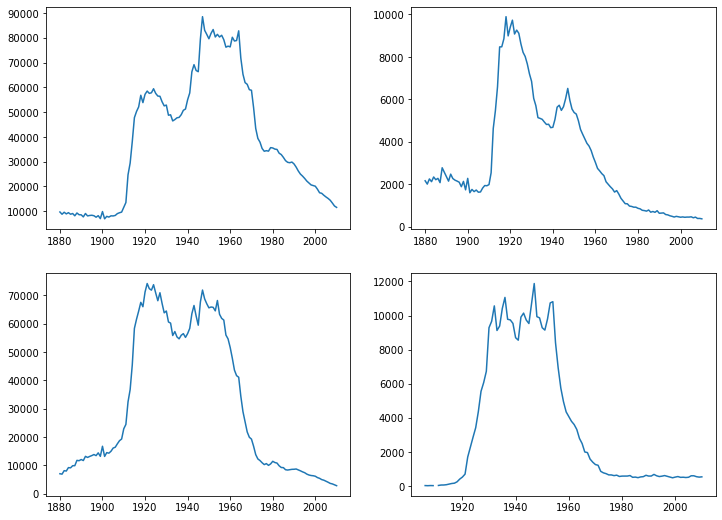

In [31]:
# 方法2

import numpy as np  
import matplotlib.pyplot as plt

#划分子图

fig,axes=plt.subplots(2,2,figsize=(12, 9))  # 把父图分成2*2个子图,创建多维窗口
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]
#设定各个透视子图在窗口的位置


#作图1
subset1 = total_births[['John']]
ax1.plot(subset1)

#作图2
subset2 = total_births[['Harry']]
ax2.plot(subset2)


#作图3
subset3 = total_births[[ 'Mary']]
ax3.plot(subset3)

#作图4
subset4 = total_births[['Marilyn']]
ax4.plot(subset4)
plt.show()

"""
fig,ax = plt.subplots()的意思是，建立一个fig对象，建立一个axis对象
也可以使用：
fig=plt.figure()
ax=fig.add_subplot(2,2)

"""

从图中可以看出，这几个名字在美国人民的心目中已经风光不再了。但事实并非如此简单，我们在下一节中就能知道是怎么一回事了。

# 变成女孩名字的男孩名字（以及相反的情况）

另一个有趣的趋势是，早年流行于男孩的名字近年来“变性了”，例如Lesley或Leslie。回到top1000数据集，找出其中以"lesl"开头的一组名字：

In [36]:
all_names = pd.Series(top1000.name.unique())

lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

lesley_like


632     Leslie
2293    Lesley
4265    Leslee
4733     Lesli
6109     Lesly
dtype: object

In [ ]:
"""
Pandas模块的数据结构主要有两种：1.Series 2.DataFrame
Series 是一维数组,其中每一个元素都有一个标签。类似于Numpy中元素带标签的数组。其中，标签可以是数字或者字符串

unique():返回参数数组中所有不同的值，并按照从小到大排序


str.contains：
pandas的数据筛选:isin和str.contains函数

模糊筛选:平时使用最多的筛选应该是字符串的模糊筛选，在SQL语句里用的是like，在pandas里我们可以用.str.contains()来实现
str.contains('lesl|ie')


&


"""

然后利用这个结果过滤其他的名字，并按名字分组计算出生数以查看相对频率：

In [27]:
filtered = top1000[top1000.name.isin(lesley_like)]

filtered.groupby('name').births.sum()

"""
groupby函数主要的作用是进行数据的分组以及分组后地组内运算

"""

name
Leslee      1082
Lesley     35037
Lesli        929
Leslie    370579
Lesly      10072
Name: births, dtype: int64

接下来，我们按性别和年度进行聚合，并按年度进行规范化处理：

In [28]:
table = filtered.pivot_table('births', index='year',
                              columns='sex', aggfunc='sum')

table = table.div(table.sum(1), axis=0)

table.tail()
"""
透视表
div函数就是对数据进行标准化

进行规格化，使得各行的和为 1，并生成图表

 axis : axis=0:行相加为1 ;
 1表示横轴,方向从左到右;0表示纵轴,方向从上到下。当axis=1时,数组的变化是横向的,体现出列的增加或者减少
 tail()：默认后五

"""

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [ ]:
"""
pandas.pivot_table
透视表是一种可以对数据动态排布并且分类汇总的表格格式
四个最重要的参数index、values、columns、aggfunc

Index
每个pivot_table必须拥有一个index
（两层索引）

Values
通过上面的操作，我们获取了james harden在对阵对手时的所有数据，而Values可以对需要的计算数据进行筛选

aggfunc
参数可以设置我们对数据聚合时进行的函数操作。

当我们未设置aggfunc时，它默认aggfunc='mean'计算均值

Columns
类似Index可以设置列层次字段，它不是一个必要参数，作为一种分割数据的可选方式。
"""



最后，就可以轻松绘制一张分性别的年度曲线图了（如图2-10所示）：

<AxesSubplot:xlabel='year'>

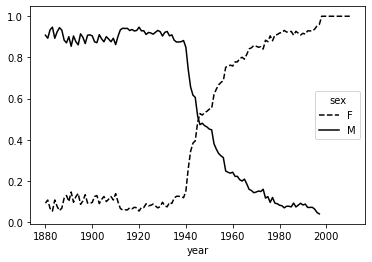

In [29]:
table.plot(style={'M': 'k-', 'F': 'k--'})
"""
‘k’	黑色
‘-‘	实线
‘–’	破折线
‘-.’	点划线
‘:’	虚线

"""

## 评估命名多样性的增长

即，父母愿意给小孩起常见的名字越来越少

方法1：计算最流行的1000个名字所占的比例

·pandas透视表 pivot_table https://www.cnblogs.com/Yanjy-OnlyOne/p/11195621.html

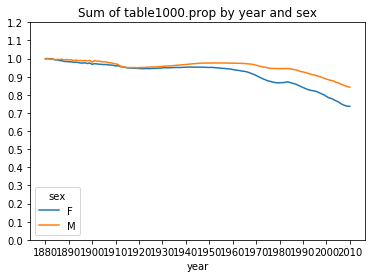

In [20]:
# 按year 和sex 进行聚合并绘图
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

从图中可以看出，名字的多样性确实出现了增长（前1000个名字的比例降低）

方法2：计算占总出生人数前50%的不同名字的数量

首先，只考虑2010年男孩的名字

·pandas数据选取：df https://www.cnblogs.com/chenhuabin/archive/2019/03/06/10485549.html

在Dataframe中选取数据大抵包括3中情况：

　　1）行（列）选取（单维度选取）：df[]。这种情况一次只能选取行或者列，即一次选取中，只能为行或者列设置筛选条件（只能为一个维度设置筛选件）。

　　2）区域选取（多维选取）：df.loc[]，df.iloc[]。这种方式可以同时为多个维度设置筛选条件。

　　3）单元格选取（点选取）：df.at[]，df.iat[]。准确定位一个单元格。

In [21]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22139,2010,0.011548
260877,Ethan,M,18006,2010,0.009392
260878,Michael,M,17361,2010,0.009056
260879,Jayden,M,17189,2010,0.008966
260880,William,M,17058,2010,0.008897
260881,Alexander,M,16757,2010,0.008740
260882,Noah,M,16460,2010,0.008586
260883,Daniel,M,15849,2010,0.008267
260884,Aiden,M,15543,2010,0.008107
260885,Anthony,M,15500,2010,0.008085


对prob降序排列，想知道前面多少个名字的人数加起来才够50%

·计算累计和：cumsum https://www.jianshu.com/p/23e7e9251abb

numpy.cumsum(a, axis=None, dtype=None, out=None)
 函数的功能是返回给定axis上的累计和
 

In [ ]:
import numpy as np
b=[1,2,3,4,5,6,7]
np.cumsum(b)

In [ ]:
c=[[1,2,3],[4,5,6],[7,8,9]]
np.cumsum(c,axis=0) #axis=0代表以行的方式累加

In [ ]:
np.cumsum(c,axis=1)  #axis=1代表以列的方式累加

·排序：sort_values https://www.cnblogs.com/avivi/p/10813318.html

DataFrame.sort_values(by=‘##’,axis=0,ascending=True, inplace=False, na_position=‘last’)

by: 指定列名(axis=0或’index’)或索引值(axis=1或’columns’)
axis: 若axis=0或’index’，则按照指定列中数据大小排序；若axis=1或’columns’，则按照指定索引中数据大小排序，默认axis=0
ascending: 是否按指定列的数组升序排列，默认为True，即升序排列
inplace: 是否用排序后的数据集替换原来的数据，默认为False，即不替换
na_position: {‘first’,‘last’}，设定缺失值的显示位置

In [22]:
#先计算prob的累计和cumsum
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260876    0.011548
260877    0.020940
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065184
260883    0.073451
260884    0.081558
260885    0.089643
Name: prop, dtype: float64

·searchsorted https://blog.csdn.net/qq_33757398/article/details/89876088

np.searchsorted(a, v, side='left', sorter=None)
在数组a中插入v(插入a数组的值，可以为单个元素，list或者array)（并不执行插入操作），返回一个下标列表，这个列表指明了v中对应元素应该插入在a中那个位置上

side : {'left', 'right'}, optional
查询方向：
当为left时，将返回第一个符合条件的元素下标；
当为right时，将返回最后一个符合条件的元素下标，如果没有符合的元素，将返回0或者N（a的长度）


例子

In [1]:
import numpy as np
a=np.array([0,1,5,9,11,18,26,33])
print (a)

[ 0  1  5  9 11 18 26 33]


In [3]:
result1=np.searchsorted(a,15)
print (result1)

5


In [4]:
result2=np.searchsorted(a,-1)
print (result2)

0


In [5]:
result3=np.searchsorted(a,35)
print (result3)

8


In [23]:
#再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序
prop_cumsum.values.searchsorted(0.5)

116

由于数组索引是从0开始的，因此这个结果要加上1，即为117

In [24]:
#拿1900年的数据进行对比
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

然后对所有的year/sex组合执行这一计算

In [28]:
#按这两个字段进行groupby处理，然后用一个函数计算各分组的这个值
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

pandas数据重排：https://blog.csdn.net/anshuai_aw1/article/details/82830916
stack：将数据从“表格结构”变成“花括号结构”
unstack:将数据从“花括号结构”变成“表格结构”

现在diversity这个DataFrame有两个时间序列（每个性别各一个，按年度索引）

In [26]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


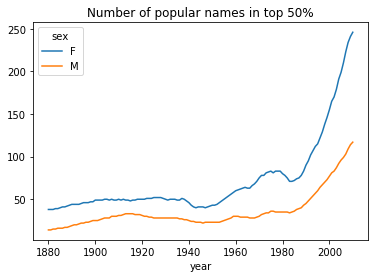

In [27]:
diversity.plot(title="Number of popular names in top 50%")

从图中可以看出，女孩名字的多样性总是高于男孩，而且这个差距变得越来越高

## “最后一个字母”的变革

In [16]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
    # lambda匿名函数的格式：冒号前是参数，可以有多个，用逗号隔开，冒号右边的为表达式。lambda返回值是函数对象
last_letters = names.name.map(get_last_letter)
    # map函数语法为map(function, iterable, ...)
    # 第一个参数 function 以参数序列中的每一个元素调用 function 函数，返回包含每次 function 函数返回值的新列表
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
    #pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    #index:用于分组的列,相当于行索引
    #aggfunc：如果不指明,默认求平均.即对values作不同的聚合
    #columns：相当于列索引,就是更细化地展示一些内容.

（1）lambda匿名函数：
def sum(x,y):
      return x+y
用lambda实现：
p = lambda x,y:x+y
print(p(4,6))
（2）map函数:
提供了两个列表，对相同位置的列表数据进行相加
map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10])
返回[3, 7, 11, 15, 19]

选出具有一定代表性的三年，并输出前面几行：

In [17]:
 subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
    #DataFrame.reindex(index=None, columns=None, **kwargs)
    #pandas的reindex对象，是数据符合新的索引来构造一个新的对象
    #Series的reindex使它符合新的索引，如果索引的值不存在就填入缺失值
    #level主要用于在多层索引上
 subtable.head()
    #head()根据位置返回对象的前n行,默认值为5.

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691278.0  677100.0    977.0    5212.0   28882.0
b                 NaN     694.0     455.0    411.0    3911.0   39294.0
c                 5.0      49.0     957.0    482.0   15457.0   23357.0
d              6751.0    3731.0    2645.0  22113.0  262120.0   44851.0
e            133601.0  435023.0  316878.0  28665.0  178760.0  130307.0

(3) reindex函数
原dataframe:  
    Ohio   Texas   California
a    0     1        2
c    3     4        5
d    6     7        8
利用colume实现列重新索引：
states = ['Texas', 'Utah', 'Ohio']
frame.reindex(columns=states)
返回：   Texas    Utah     Ohi0
a        1     NaN       0
c        4     NaN       3
d        7     NaN       6

接下来我们需要按总出生数对该表进行规范化处理，以便计算出各性别各末字母占总出生人数的比例：

In [18]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022012.0
     2010    1775986.0
M    1910     194210.0
     1960    2132115.0
     2010    1917177.0
dtype: float64

In [19]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341876  0.381253  0.005031  0.002445  0.015065
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020496
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113861  0.122939  0.023394
e            0.336947  0.215144  0.178424  0.147598  0.083842  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h            0.051530  0.036222  0.075989  0.045564  0.037913  0.051822
i            0.001526  0.039965  0.031697  0.000844  0.000610  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049375  0.018532
l            0.043187  0.033868  0.026390  0.065022  0.104893  0.070457
m            0.001200  0.008613  0.002599  0.058045  0.033831  0.024706
n            0.079237  0.130671  0.140053  0.143386  0.152518  0.362410
o            0.001672  0.002439  0.001247  0.017064  0.012845  0.042563
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018047  0.064471  0.031043  0.087393
s            0.039036  0.012765  0.013337  0.130797  0.102698  0.065158
t            0.027432  0.015198  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152555  0.116760  0.077344  0.160993  0.058201
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

有了这个字母比例数据之后，就可以生成一张各年度各性别的条形图了,条形图如下：

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

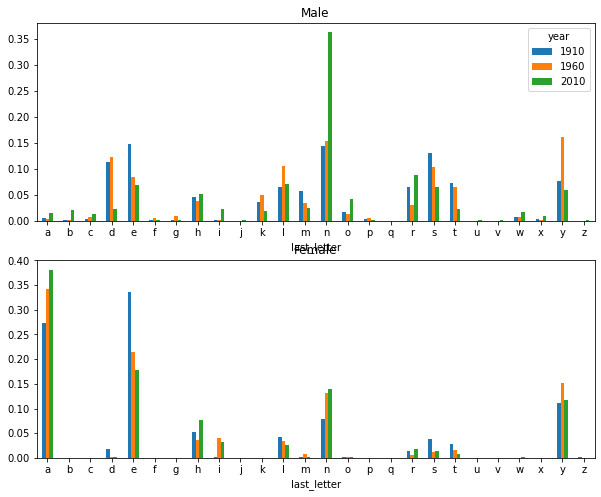

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# 生成两个子图，分别绘制男女生趋势
# 第一个参数为子图行数；第二个参数为子图列数，figsize设置子图的高度与宽度
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)
#kind为画图类型,rot为旋转角度,title设置标题头
#axes[0]是第一个子图，axes[1]是第二个子图

(4)plt.subplots()用法：

<AxesSubplot:title={'center':'Male'}>

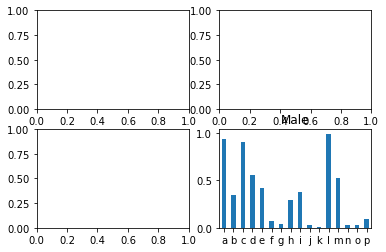

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 2)
data=pd.Series(np.random.rand(16),index=list('abcdefghijklmnop'))
data.plot(kind='bar', rot=0, ax=axes[1,1], title='Male')

可以看出，从20世纪60年代开始，以字母"n"结尾的男孩名字出现了显著的增长。回到之前创建的那个完整表，按年度和性别对其进行规范化处理，并在男孩名字中选取几个字母，最后进行转置以便将各个列做成一个时间序列：

In [21]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
# 以标签索引取出的d,n,y字母的数据，最后进行转置
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153219,0.077458
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


（5）loc()函数的用法:
    loc为Selection by Label函数，即为按标签取数据.
    第一个参数选取index,第二个参数选取column.

In [22]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(5,2),index=range(0,5,1),columns=list('AB'))
df

,A,B
0,1.301490,-0.995007
1,-2.026081,0.152821
2,0.742388,0.346105
3,0.634111,-0.709551
4,-1.207466,-0.082566


In [4]:
df.loc[0:2,'A']

0   -0.409725
1   -1.583159
2   -1.189528
Name: A, dtype: float64

有了这个时间序列的DataFrame之后，就可以通过其plot方法绘制出一张趋势图了：

<AxesSubplot:xlabel='year'>

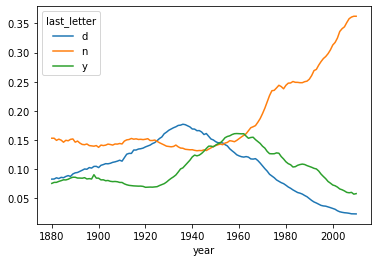

In [23]:
dny_ts.plot()

plot()默认在一个subplot中把各列绘制成一条线.